# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## background

(Please insert the background here )

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [36]:
import requests

url_get = requests.get('https://www.imdb.com/search/title/?release_date=2021-01-01,2021-12-31')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [37]:
url_get.content[1:500]

b'\n<!DOCTYPE html>\n<html\n    xmlns:og="http://ogp.me/ns#"\n    xmlns:fb="http://www.facebook.com/2008/fbml">\n    <head>\n         \n\n        <meta charset="utf-8">\n        <meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n\n\n\n        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:\'java\'};</script>\n\n<script>\n    if (typeof uet == \'function\') {\n      uet("bb", "LoadTitle", {wb: 1});\n    }\n</script>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [38]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [39]:
table = soup.find('div',{'class':'lister list detail sub-list'})
print(table.prettify()[1:500])

div class="lister list detail sub-list">
 <div class="lister-list">
  <div class="lister-item mode-advanced">
   <div class="lister-top-right">
    <div class="ribbonize" data-caller="filmosearch" data-tconst="tt9032400">
    </div>
   </div>
   <div class="lister-item-image float-left">
    <a href="/title/tt9032400/">
     <img alt="Eternals" class="loadlate" data-tconst="tt9032400" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BMTExZmVjY2ItYTAzYi00MDdlLWFlOWItNTJhMDRjMzQ5ZGY0X


Finding row length.

Do the scrapping process here (please change this markdown with your explanation)

In [40]:
row = table.find_all('div',attrs={'class':'lister-item mode-advanced'})

In [41]:
temp = []

for item in row:

    title = item.find_all('h3',attrs={'class':'lister-item-header'})[0].text[3:]
    title = title.replace('\n','').replace('(2021)','').replace('(2021– )','').replace('.','')
    
    try:
    #get volume
        imdb = item.find_all('div',attrs={'class' : 'inline-block ratings-imdb-rating'})[0].text
        imdb = imdb.replace('\n','')
    except:
        imdb ='0.0'
        
    try:
        metascore = item.find_all('div',attrs={'class' : 'ratings-metascore'})[0].text
        metascore = metascore.replace('\n','').replace('Metascore','').replace('                            ','')
    except:
        metascore = '0'
    
    try:
    #scrapping process, menampilkan text yang ada di website
        votes = item.find_all('span',attrs={'name':'nv'})[0].text
        votes = votes.replace(',','')
    except:
        votes = '0'
        
    temp.append((title,imdb,metascore,votes))    
temp

[('Eternals', '6.9', '53', '53550'),
 ('Dune: Part One', '8.2', '74', '291461'),
 ('Army of Thieves', '6.4', '49', '29287'),
 ('The Harder They Fall', '6.5', '68', '17813'),
 ('Squid Game', '8.1', '0', '288302'),
 ('Last Night in Soho', '7.5', '65', '16340'),
 ('No Time to Die', '7.5', '68', '148867'),
 ('Finch', '7.0', '56', '15902'),
 ('The French Dispatch', '7.5', '74', '16865'),
 ('Maid', '8.5', '0', '40594'),
 ('Halloween Kills', '5.7', '42', '53212'),
 ('Midnight Mass', '7.7', '0', '69809'),
 ('Army of the Dead', '5.8', '57', '147512'),
 ('Invasion', '5.8', '0', '8318'),
 ('Foundation', '7.3', '0', '24766'),
 ('House of Gucci', '0.0', '0', '0'),
 ('Hypnotic', '5.2', '32', '8076'),
 ('The Book of Boba Fett', '0.0', '0', '0'),
 ('Free Guy', '7.2', '62', '190693'),
 ('Venom: Let There Be Carnage', '6.3', '48', '58042'),
 ('The Last Duel', '7.7', '67', '20622'),
 ('Dopesick', '8.8', '0', '5705'),
 ('Antlers', '6.4', '57', '4217'),
 ('Spencer', '7.2', '78', '3307'),
 ('The Wheel of Ti

## Creating data frame & Data wrangling

Put the array into dataframe

In [42]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('title','metascore','imdb','votes'))
df

,title,metascore,imdb,votes
0,Eternals,6.9,53,53550
1,Dune: Part One,8.2,74,291461
2,Army of Thieves,6.4,49,29287
3,The Harder They Fall,6.5,68,17813
4,Squid Game,8.1,0,288302
5,Last Night in Soho,7.5,65,16340
6,No Time to Die,7.5,68,148867
7,Finch,7.0,56,15902
8,The French Dispatch,7.5,74,16865
9,Maid,8.5,0,40594


Do the data cleaning here (please change this markdown with your explanation of what you do for data wrangling)

In [43]:
df['imdb'] = df['imdb'].astype('int')
df['metascore'] = df['metascore'].astype('float')
df['votes'] = df['votes'].astype('int')
df=df.set_index('title')
df.dtypes

metascore    float64
imdb           int32
votes          int32
dtype: object

Data visualisation (please change this markdown with your explanation of what you do for data wrangling)

Buatlah plot dari 7 film paling populer di tahun 2021 berdasarkan metascore

<AxesSubplot:xlabel='title'>

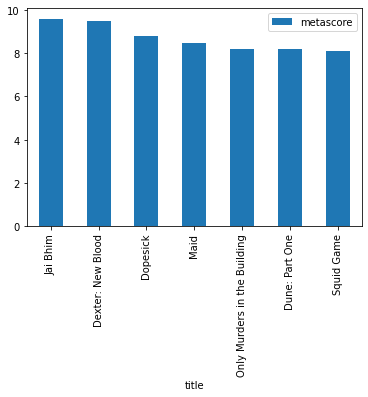

In [45]:
#pd.pivot_table(data=df,
#              index='title',
#              values='metascore').sort_values('metascore', ascending=False).iloc[0:7,0:2]#.plot.bar()
#plt.savefig('metascore.png',bbox_inches="tight")

df.iloc[:,0:1].sort_values('metascore', ascending=False).iloc[0:7,:].plot.bar()

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 


(Put your analysis and conclusion here.)

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.